In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Langevin-Funktion

Für die anhystereische Kennlinie (Wendepunkte bei symmetrischer Aussteuerung) des Jiles-Atherton-Modells wird eine Langevin-Funktion verwendet:

\begin{equation}
    M_\text{an} = M_\text{sat} \mathrm{L}\left(\frac{H_\text{e}}{a}\right),
\end{equation}

mit $L(x) = \coth(x)-\frac{1}{x}$.

### Näherungen für kleine und große Argumente
Gemäß Abramowitz, Stegun gilt für kleine Argumente von $\coth(x)$:

$$ \coth(x) = \frac{1}{x} + \frac{x}{3} - \frac{x^3}{45} + \frac{2}{945}x^5 - \dots, $$

für die Langevinfunktion folgt somit

$$ \mathrm{L}(x) \approx \frac{x}{3} \quad\text{für $|x|\ll 1$.} $$

Für Werte $|x| < 0.12$ bleibt der relative Fehler unter $0.001$.

Für große Argumente $|x| \gg 1$ gilt wiederum

$$ \coth(x) \approx 1, $$

womit auch $\mathrm{L}(x) \approx 1$ für $x \gg 1$ gilt. Diese Näherung hat ab einem Wert con $|x|=1000$ einen Fehler unter $0.001$.

In [4]:
def langevin(x):
    if abs(x) < 1e-1:
        return x/3.0
    elif abs(x) > 1e8:
        return np.sign(x)
    else:
        return 1/np.tanh(x)-1/x
    
vec_langevin = np.vectorize(langevin)

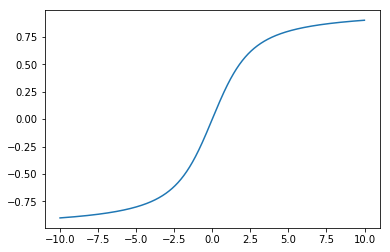

In [5]:
x = np.arange(-1e1, 1e1, 1e-2)
y = vec_langevin(x)
plt.plot(x, y)
plt.show()

### Ableitung

Für die Ableitung der Langevin-Funktion erhält man:

$$ \frac{d\mathrm{L}(x)}{dx} = \frac{1}{x^2} - {\mathrm{csch}}^2(x)$$

mit dem Cosekans hyperbolicus $\mathrm{csch}(x)$. Für kleine Argumente folgt aus den obigen Reihenentwicklungen

$$ \frac{d\mathrm{L}(x)}{dx} \approx \frac{1}{3} - \frac{1}{15}x^2. $$

Diese Näherung hat für $|x| < 0.42$ einen Fehler unter $0.001$.

Für große Argumente konvergieren sowohl $1/x^2$ als auch ${\mathrm{csch}}^2(x)$ gegen Null.

In [8]:
def grad_langevin(x):
    if abs(x) < 0.42:
        return 1/3.0 - 1/15.0 * x**2
    elif abs(x) > 1e2:
        return 1/x**2
    elif abs(x) > 1e8:
        return 0.0
    else:
        return 1/x**2 - 1/np.sinh(x)**2

vec_grad_langevin = np.vectorize(grad_langevin)

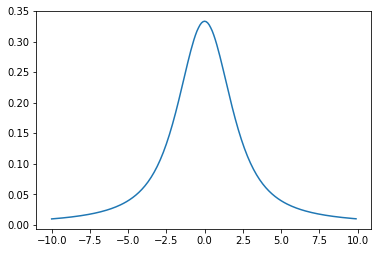

In [11]:
x = np.arange(-1e1, 1e1, 1e-1)
y = vec_grad_langevin(x)
plt.plot(x, y)
plt.show()